In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import KBinsDiscretizer

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.tree import DecisionTreeClassifier

In [17]:
df = pd.read_csv(r"C:\Users\Asus\OneDrive\Desktop\Dataset\train_titanic_dataset.csv",usecols = ['Age','Fare','Survived'])
df

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
...,...,...,...
886,0,27.0,13.0000
887,1,19.0,30.0000
888,0,NaN,23.4500
889,1,26.0,30.0000


In [18]:
df.shape

(891, 3)

In [24]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [25]:
df.dropna(inplace= True)

In [26]:
x = df.iloc[:,1:3]
y = df.iloc[:,0]

In [27]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 42,test_size = 0.2)

In [28]:
clf = DecisionTreeClassifier()

In [29]:
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)

In [30]:
accuracy_score(y_test,y_pred)

0.6293706293706294

# cross validation

In [31]:
cross_val_score(DecisionTreeClassifier(),x,y,cv=10,scoring = 'accuracy')

array([0.625     , 0.58333333, 0.625     , 0.66666667, 0.56338028,
       0.73239437, 0.74647887, 0.63380282, 0.57746479, 0.6056338 ])

In [32]:
np.mean(cross_val_score(DecisionTreeClassifier(),x,y,cv=10,scoring = 'accuracy'))

0.6331572769953051

# applying KBINS DISCRETIZER

In [33]:
# Lets create an object
kbin_age = KBinsDiscretizer(n_bins =10,encode = 'ordinal',strategy = 'quantile')
kbin_fare = KBinsDiscretizer(n_bins = 10,encode='ordinal',strategy = 'quantile')

In [35]:
trf = ColumnTransformer([
    ('first',kbin_age,[0]),
    ('second',kbin_fare,[1])
])

In [36]:
x_train_trf = trf.fit_transform(x_train)
x_test_trf = trf.transform(x_test)

In [37]:
trf.named_transformers_

{'first': KBinsDiscretizer(encode='ordinal', n_bins=10),
 'second': KBinsDiscretizer(encode='ordinal', n_bins=10)}

In [46]:
trf.named_transformers_['second'].n_bins_
# see 10 bins are created 

array([10])

In [48]:
# lets see the bin edges 
trf.named_transformers_['second'].bin_edges_

array([array([  0.    ,   7.75  ,   7.8958,   9.225 ,  13.    ,  15.75  ,
               26.    ,  29.125 ,  51.4792,  82.1708, 512.3292])         ],
      dtype=object)

In [49]:
trf.named_transformers_['first'].bin_edges_

array([array([ 0.42, 14.  , 19.  , 22.  , 25.  , 28.5 , 32.  , 36.  , 42.  ,
              50.  , 80.  ])                                                ],
      dtype=object)

In [52]:
output = pd.DataFrame({
    'age':x_train['Age'],
    'age_trf':x_train_trf[:,0],
    'fare':x_train['Fare'],
    'fare_trf':x_train_trf[:,1]
})

In [53]:
output['age_labels'] = pd.cut(x=x_train['Age'],
                                    bins=trf.named_transformers_['first'].bin_edges_[0].tolist())
output['fare_labels'] = pd.cut(x=x_train['Fare'],
                                    bins=trf.named_transformers_['second'].bin_edges_[0].tolist())

In [54]:
output.sample(5)

,age,age_trf,fare,fare_trf,age_labels,fare_labels
755,0.67,0.0,14.5000,4.0,"(0.42, 14.0]","(13.0, 15.75]"
599,49.00,8.0,56.9292,8.0,"(42.0, 50.0]","(51.479, 82.171]"
456,65.00,9.0,26.5500,6.0,"(50.0, 80.0]","(26.0, 29.125]"
808,39.00,7.0,13.0000,4.0,"(36.0, 42.0]","(9.225, 13.0]"
592,47.00,8.0,7.2500,0.0,"(42.0, 50.0]","(0.0, 7.75]"


In [55]:
clf = DecisionTreeClassifier()
clf.fit(x_train_trf,y_train)
y_pred2 = clf.predict(x_test_trf)

In [56]:
accuracy_score(y_test,y_pred2)

0.6223776223776224

In [57]:
clf = DecisionTreeClassifier()
clf.fit(x_train_trf,y_train)
y_pred2 = clf.predict(x_test_trf)

In [58]:
accuracy_score(y_test,y_pred2)

0.6223776223776224

In [59]:
x_trf = trf.fit_transform(x)
np.mean(cross_val_score(DecisionTreeClassifier(),x,y,cv=10,scoring='accuracy'))

0.6331377151799688

In [62]:
def discretize(bins,strategy):
    kbin_age = KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)
    kbin_fare = KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)
    
    trf = ColumnTransformer([
        ('first',kbin_age,[0]),
        ('second',kbin_fare,[1])
    ])
    
    x_trf = trf.fit_transform(x)
    print(np.mean(cross_val_score(DecisionTreeClassifier(),x,y,cv=10,scoring='accuracy')))
    
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(x['Age'])
    plt.title("Before")

    plt.subplot(122)
    plt.hist(x_trf[:,0],color='red')
    plt.title("After")

    plt.show()
    
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(x['Fare'])
    plt.title("Before")

    plt.subplot(122)
    plt.hist(x_trf[:,1],color='red')
    plt.title("Fare")

    plt.show()
    

0.6289123630672926


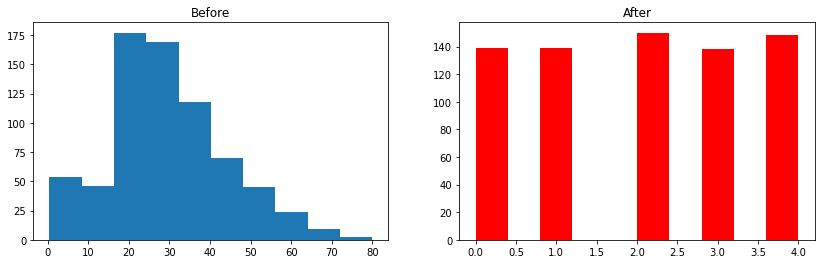

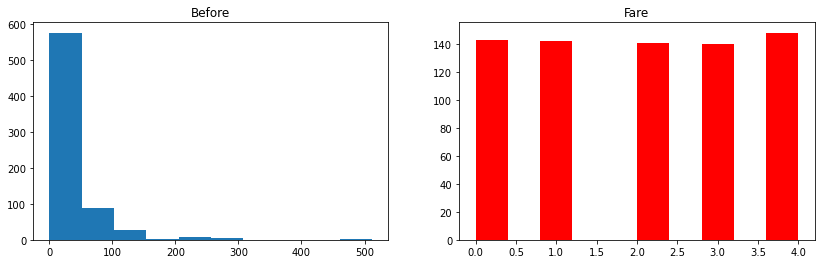

In [64]:
discretize(5,'quantile')

0.6288928012519561


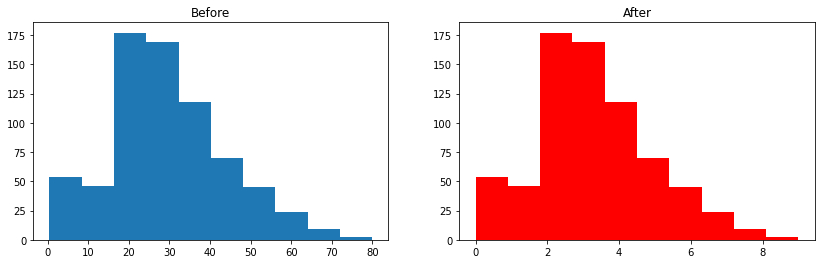

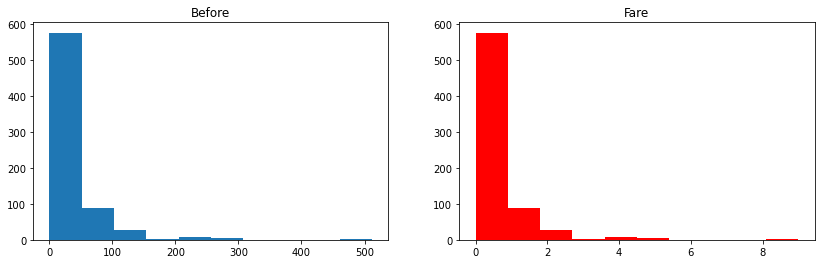

In [65]:
discretize(10,'uniform')

In [67]:
discretize(10,'kmeans')

AttributeError: 'NoneType' object has no attribute 'split'